In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import cv2

In [2]:
class VGGNet_s:
    def __init__(self):
        with tf.device('/gpu:0'):
            self.x = tf.placeholder(tf.float32, [None, 64, 64, 3])
            self.y_ = tf.placeholder(tf.float32, [None, 200])
            self.keep_prob = tf.placeholder(tf.float32)
            self.regularization = 5e-4

            #Convolutional layer no 1
            self.W1_1 = tf.get_variable("W1_1", shape=[3,3,3,64], initializer=tf.contrib.layers.xavier_initializer())#tf.Variable(tf.truncated_normal([3,3,3,64], stddev=0.1))
            b1_1 = tf.Variable(tf.constant(0.01, shape=[64]))
            self.conv3_64 = tf.nn.conv2d(self.x, self.W1_1, strides = [1,1,1,1], padding='SAME')
            self.conv3_64_relu = tf.nn.relu(self.conv3_64 + b1_1)

            # Convolutional layer no 2
            W1_2 = tf.get_variable("W1_2", shape=[3,3,64,64], initializer=tf.contrib.layers.xavier_initializer())#tf.Variable(tf.truncated_normal([3, 3, 64, 64], stddev=0.1))
            b1_2 = tf.Variable(tf.constant(0.01, shape=[64]))
            conv3_64_2 = tf.nn.conv2d(self.conv3_64_relu, W1_2, strides=[1, 1, 1, 1], padding='SAME')
            conv3_64_2_relu = tf.nn.relu(conv3_64_2 + b1_2)

            #Max pooling layer
            max_pool_2x2_1 = tf.nn.max_pool(conv3_64_2_relu, ksize=[1,2,2,1], strides = [1,2,2,1], padding='SAME')

            #current image dimensions:  32x32

            #convolutional layer no 3
            W2_1 = tf.get_variable("W2_1", shape=[3,3,64,128], initializer=tf.contrib.layers.xavier_initializer())#tf.Variable(tf.truncated_normal([3,3,64,128], stddev=0.1))
            b2_1 = tf.Variable(tf.constant(0.01, shape=[128]))
            conv3_128 = tf.nn.conv2d(max_pool_2x2_1, W2_1, strides = [1,1,1,1], padding='SAME')
            conv3_128_relu = tf.nn.relu(conv3_128 + b2_1)

            # convolutional layer no 4
            W2_2 = tf.get_variable("W2_2", shape=[3,3,128,128], initializer=tf.contrib.layers.xavier_initializer())#tf.Variable(tf.truncated_normal([3, 3, 128, 128], stddev=0.1))
            b2_2 = tf.Variable(tf.constant(0.01, shape=[128]))
            conv3_128_2 = tf.nn.conv2d(conv3_128_relu, W2_2, strides=[1, 1, 1, 1], padding='SAME')
            conv3_128_2_relu = tf.nn.relu(conv3_128_2 + b2_2)

            #Max pooling layer
            max_pool_2x2_2 = tf.nn.max_pool(conv3_128_2_relu, ksize=[1,2,2,1], strides = [1,2,2,1], padding='SAME')

            #current image dimensions: 16x16


            # convolutional layer No5
            W3_1 = tf.get_variable("W3_1", shape=[3,3,128,256], initializer=tf.contrib.layers.xavier_initializer())#tf.Variable(tf.truncated_normal([3,3, 128, 256], stddev=0.1))
            b3_1 = tf.Variable(tf.constant(0.01, shape=[256]))
            conv3_256 = tf.nn.conv2d(max_pool_2x2_2, W3_1, strides = [1,1,1,1], padding='SAME')
            conv3_256_relu = tf.nn.relu(conv3_256 + b3_1)

            # convolutional layer No6
            W3_2 = tf.get_variable("W3_2", shape=[3,3,256,256], initializer=tf.contrib.layers.xavier_initializer())#tf.Variable(tf.truncated_normal([3, 3, 256, 256], stddev=0.1))
            b3_2 = tf.Variable(tf.constant(0.01, shape=[256]))
            conv3_256_2 = tf.nn.conv2d(conv3_256_relu, W3_2, strides=[1, 1, 1, 1], padding='SAME')
            conv3_256_2_relu = tf.nn.relu(conv3_256_2 + b3_2)

            #convolutional layer No7
            W3_3 = tf.get_variable("W3_3", shape=[3,3,256,256], initializer=tf.contrib.layers.xavier_initializer())#tf.Variable(tf.truncated_normal([3,3,256, 256], stddev=0.1))
            b3_3 = tf.Variable(tf.constant(0.01, shape=[256]))
            conv3_256_3 = tf.nn.conv2d(conv3_256_2_relu, W3_3, strides = [1,1,1,1], padding='SAME')
            conv3_256_3_relu = tf.nn.relu(conv3_256_3 + b3_3)

            #Max pooling layer
            max_pool_2x2_3 = tf.nn.max_pool(conv3_256_3_relu, ksize=[1,2,2,1], strides = [1,2,2,1], padding='SAME')

            #current image dimensions: 8x8


            # convolutional layer No8
            W4_1 = tf.get_variable("W4_1", shape=[3,3,256,512], initializer=tf.contrib.layers.xavier_initializer())#tf.Variable(tf.truncated_normal([3,3, 256, 512], stddev=0.1))
            b4_1 = tf.Variable(tf.constant(0.01, shape=[512]))
            conv3_512 = tf.nn.conv2d(max_pool_2x2_3, W4_1, strides = [1,1,1,1], padding='SAME')
            conv3_512_relu = tf.nn.relu(conv3_512 + b4_1)

            # convolutional layer No9
            W4_2 = tf.get_variable("W4_2", shape=[3,3,512,512], initializer=tf.contrib.layers.xavier_initializer())#tf.Variable(tf.truncated_normal([3, 3, 512, 512], stddev=0.1))
            b4_2 = tf.Variable(tf.constant(0.01, shape=[512]))
            conv3_512_2 = tf.nn.conv2d(conv3_512_relu, W4_2, strides=[1, 1, 1, 1], padding='SAME')
            conv3_512_2_relu = tf.nn.relu(conv3_512_2 + b4_2)

            #convolutional layer No10
            W4_3 = tf.get_variable("W4_3", shape=[3,3,512,512], initializer=tf.contrib.layers.xavier_initializer())#tf.Variable(tf.truncated_normal([3,3,512, 512], stddev=0.1))
            b4_3 = tf.Variable(tf.constant(0.01, shape=[512]))
            conv3_512_3 = tf.nn.conv2d(conv3_512_2_relu, W4_3, strides = [1,1,1,1], padding='SAME')
            conv3_512_3_relu = tf.nn.relu(conv3_512_3 + b4_3)

            #Max pooling layer
            max_pool_2x2_4 = tf.nn.max_pool(conv3_512_3_relu, ksize=[1,2,2,1], strides = [1,2,2,1], padding='SAME')

            #current image dimensions: 4x4


            '''
            # convolutional layer No11
            W5_1 = tf.Variable(tf.truncated_normal([3,3, 512, 512], stddev=0.1))
            b5_1 = tf.Variable(tf.constant(0.1, shape=[512]))
            conv3_512_4 = tf.nn.conv2d(max_pool_2x2_4, W5_1, strides = [1,1,1,1], padding='SAME')
            conv3_512_4_relu = tf.nn.relu(conv3_512_4 + b5_1)

            # convolutional layer No12
            W5_2 = tf.Variable(tf.truncated_normal([3, 3, 512, 512], stddev=0.1))
            b5_2 = tf.Variable(tf.constant(0.1, shape=[512]))
            conv3_512_5 = tf.nn.conv2d(conv3_512_4_relu, W5_2, strides=[1, 1, 1, 1], padding='SAME')
            conv3_512_5_relu = tf.nn.relu(conv3_512_5 + b5_2)

            #convolutional layer No13
            W5_3 = tf.Variable(tf.truncated_normal([3,3,512, 512], stddev=0.1))
            b5_3 = tf.Variable(tf.constant(0.1, shape=[512]))
            conv3_512_6 = tf.nn.conv2d(conv3_512_5_relu, W5_3, strides = [1,1,1,1], padding='SAME')
            conv3_512_6_relu = tf.nn.relu(conv3_512_6 + b5_3)

            #Max pooling layer
            max_pool_2x2_5 = tf.nn.max_pool(conv3_512_6_relu, ksize=[1,2,2,1], strides = [1,2,2,1], padding='SAME')
            '''


            #Fully connected layer 1
            W_fc1 = tf.get_variable("W_fc1", shape=[4*4*512, 4096], initializer=tf.contrib.layers.xavier_initializer())#tf.Variable(tf.truncated_normal([4*4*512, 4096], stddev=0.1))
            b_fc1 = tf.Variable(tf.constant(0.01, shape=[4096]))

            h_pool5_flat = tf.reshape(max_pool_2x2_4, [-1, 4*4*512])
            h_fc1 = tf.nn.relu(tf.nn.xw_plus_b(h_pool5_flat, W_fc1, b_fc1))

            h_fc1_drop = tf.nn.dropout(h_fc1, self.keep_prob)

            #Fully connected layer 2
            W_fc2 = tf.get_variable("W_fc2", shape=[4096, 4096], initializer=tf.contrib.layers.xavier_initializer())#tf.Variable(tf.truncated_normal([4096, 4096], stddev=0.1))
            b_fc2 = tf.Variable(tf.constant(0.01, shape=[4096]))

            h_fc2 = tf.nn.relu(tf.nn.xw_plus_b(h_fc1_drop, W_fc2, b_fc2))
            h_fc2_drop = tf.nn.dropout(h_fc2, self.keep_prob)


            #Fully connected layer 3
            W_fc3 = tf.get_variable("W_fc3", shape=[4096, 200], initializer=tf.contrib.layers.xavier_initializer())#tf.Variable(tf.truncated_normal([4096, 200], stddev=0.1))
            b_fc3 = tf.Variable(tf.constant(0.01, shape=[200]))

            h_fc3 = tf.nn.xw_plus_b(h_fc2_drop, W_fc3, b_fc3)

            cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels= self.y_, logits=h_fc3))
            #cross_entropy = tf.reduce_mean(-tf.reduce_sum(self.y_ * tf.log(h_fc3), reduction_indices=[1]))

            self.loss = cross_entropy

            correct_prediction = tf.cast(tf.equal(tf.argmax(h_fc3, 1), tf.argmax(self.y_, 1)), tf.float32)
            self.accuracy = tf.reduce_mean(correct_prediction)

        try:
            config = tf.ConfigProto(allow_soft_placement=True)
            config.gpu_options.allow_growth = True
            self.sess = tf.Session(config= config)
        except:
            config = tf.ConfigProto(allow_soft_placement=True)
            config.gpu_options.allow_growth = True
            self.sess = tf.Session(config= config)
        
        # model saver
        self.saver = tf.train.Saver()
    def restore_par(self, logs_path):
        self.saver.restore(self.sess, logs_path)
        print('----------weights initialized---------')

In [3]:
vgg = VGGNet_s()

In [4]:
def show_w1(w, verbose = False):
    img_no = w.shape[0]
    dim_w = int(np.sqrt(img_no))
    dim_h = int(img_no/dim_w)
    if verbose:
        print('Number of columns: %s' %dim_w)
        print('Number of rows: %s' %dim_h)
    plt.figure(figsize=(10,10))
    for i in range(dim_h):
        for j in range(dim_w):
            plt.subplot(dim_h, dim_w, dim_w*i + j + 1)
            fig = plt.imshow(w[dim_w*i + j])
            fig.axes.get_xaxis().set_visible(False)
            fig.axes.get_yaxis().set_visible(False)
            if dim_w*i + j == img_no:
                break
    plt.show()

def show_output(output1_1, verbose=False):
    img_no = output1_1.shape[0]
    dim_w = int(np.sqrt(img_no))
    dim_h = int(img_no/dim_w)
    if verbose:
        print('Number of columns: %s' %dim_w)
        print('Number of rows: %s' %dim_h)
    plt.figure(figsize=(10,10))
    for i in range(dim_h):
        for j in range(dim_w):
            plt.subplot(dim_h, dim_w, dim_w*i + j + 1)
            fig = plt.imshow(output1_1[dim_w*i + j,0])
            fig.axes.get_xaxis().set_visible(False)
            fig.axes.get_yaxis().set_visible(False)
            if dim_w*i + j == img_no:
                break
    plt.show()

In [5]:
xvalid = np.load('/s/red/a/nobackup/vision/jason/tinyImageNet/xvalid_tinyimgnet.npy')
xsample = xvalid[2:3, :, :, :]

INFO:tensorflow:Restoring parameters from /s/red/a/nobackup/vision/jason/Projects/vgg-net/
----------weights initialized---------


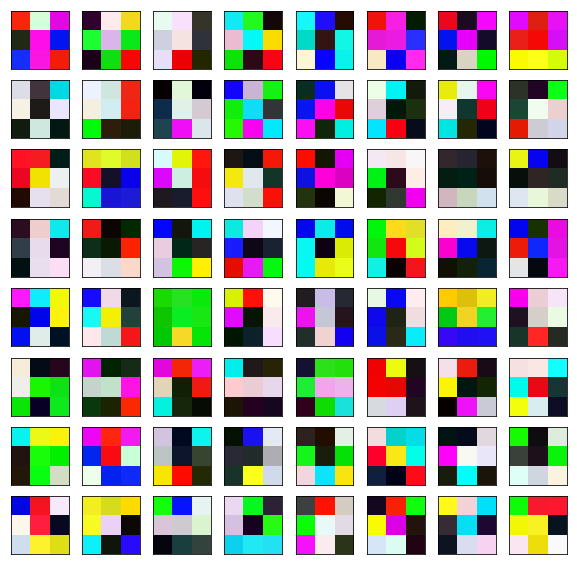

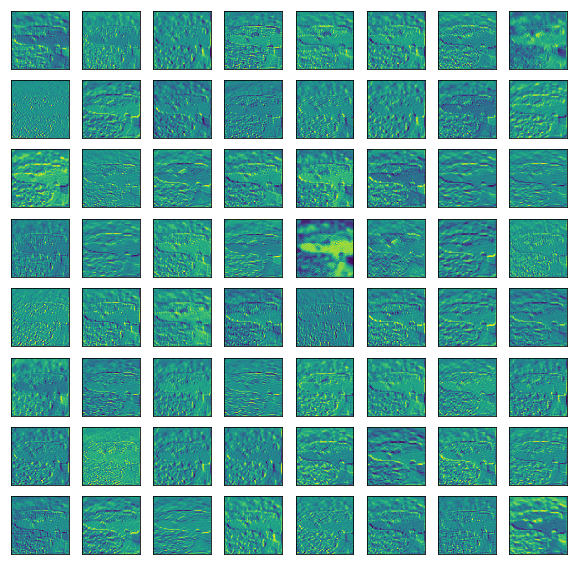

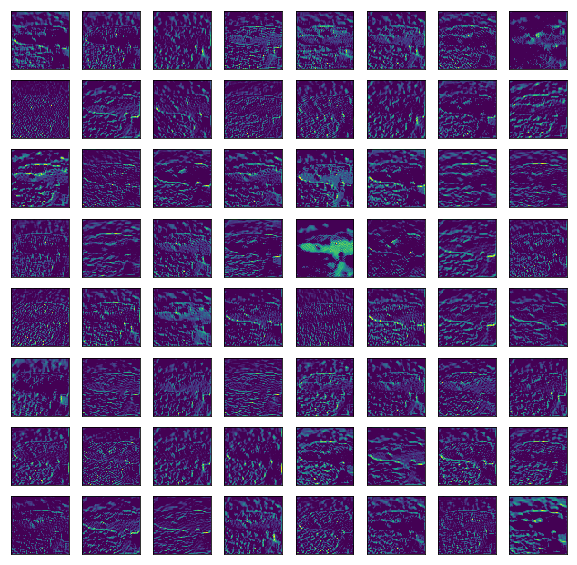

In [6]:
vgg.restore_par('/s/red/a/nobackup/vision/jason/Projects/vgg-net/')
W1_1 = np.rollaxis(vgg.sess.run(vgg.W1_1), -1)
show_w1(W1_1)
output1_1 = np.rollaxis(vgg.sess.run(vgg.conv3_64, {vgg.x: xsample}), -1)
output1_1_relu = np.rollaxis(vgg.sess.run(vgg.conv3_64_relu, {vgg.x: xsample}), -1)
show_output(output1_1)
show_output(output1_1_relu)